## Automatic Lincense Plate Detection and Recognition using Canny Edge Detection Algorithm (Open CV)

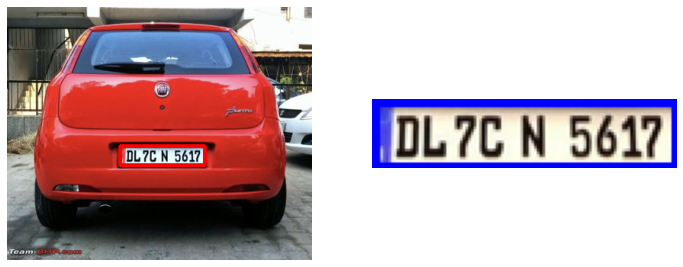

In [ ]:
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import os

# Store the Test Images in a folder named Test_dataset and save the jupyter notebook file in the same directory
path=r'Test_dataset\Cars34.png'

image = cv2.imread(path)

# Convert to Grayscale Image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection
canny_edge = cv2.Canny(gray_image, 170, 200)
 
# Find contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]

# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x=y=w=h= None

# Find the contour with 4 potential corners and creat ROI around it
for contour in contours:
# Find Perimeter of contour and it should be a closed contour
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
    if len(approx) == 4:     #see whether it is a Rect
        contour_with_license_plate = approx
        x, y, w, h = cv2.boundingRect(contour)
        license_plate = gray_image[y:y + h, x:x + w]
        break

# Removing Noise from the detected image, before sending to Tesseract
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)
 
# Draw License Plate and write the Text
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3) 
LpImg = image[y:y+h, x:x+w]

fig = plt.figure(figsize=(12,6))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.axis(False)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[1])
plt.axis(False)
plt.imshow(LpImg)
#plt.savefig('Results_OpenCV/LP_Cars34.png')

In [ ]:
import easyocr

reader = easyocr.Reader(['en'])
result = reader.readtext(LpImg,detail=0)

print(f'Detected License Plate Number is:\n{result}')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected License Plate Number is:
['@L7C N 5617]']
